# Project 3: NLP Classification of Two Topics (Marvel Cinematic Universe vs DC Extended Universe)

# 04: Modelling, Model Evaluation and Conclusion

In this notebook, we will perform the NLP modelling and evaluate the models

## Import Libraries

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
accuracy_score, RocCurveDisplay, roc_auc_score, recall_score, precision_score, \
f1_score
from wordcloud import WordCloud

In [2]:
# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [3]:
# Import cleaned data to calculate base model score

marvel = pd.read_csv('../data/marvel_clean.csv')
dceu = pd.read_csv('../data/dceu_clean.csv')

In [4]:
# Import train and test dataset

X_train = pickle.load(open('../data/X_train.pkl', 'rb'))
X_test = pickle.load(open('../data/X_test.pkl', 'rb'))
y_train = pickle.load(open('../data/y_train.pkl', 'rb'))
y_test = pickle.load(open('../data/y_test.pkl', 'rb'))

## Base Model

We will calculate the baseline score first. This is done by creating a dummy model to act as a baseline mode. All models trained later on can compare against this score to base its performance.

In [5]:
# Combine both datasets
posts = pd.concat([marvel, dceu], axis=0, ignore_index=True)

In [6]:
# Check that both datasets have been combined successfully. 
posts.shape

(1957, 3)

In [7]:
# Check the distribution between Marvel and DCEU
posts['subreddit'].value_counts(normalize=True)

marvelstudios    0.510475
DC_Cinematic     0.489525
Name: subreddit, dtype: float64

In [8]:
# Create dummy model to get baseline scores
dummy_class = DummyClassifier(strategy='uniform')

In [9]:
# Fit the model
dummy_class.fit(X_train, y_train)

DummyClassifier(strategy='uniform')

In [10]:
# Check the training score
dummy_class.score(X_train, y_train)

0.4942058623040218

In [11]:
# Check the test score
dummy_class.score(X_test, y_test)

0.5

In [12]:
# Predict the classification on the test set
y_pred = dummy_class.predict(X_test)

# Generate the confusion matrix
cm0 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm0.ravel()

# Instantiate an empty dictionary to store our model scores
model_0 = {}

# Calcalate the model scores
model_0['accuracy'] = accuracy_score(y_test, y_pred)
model_0['specificity'] = tn / (tn + fp)
model_0['recall'] = recall_score(y_test, y_pred)
model_0['precision'] = precision_score(y_test, y_pred)
model_0['f1'] = f1_score(y_test, y_pred)

In [13]:
# Check the scores
model_0

{'accuracy': 0.5020408163265306,
 'specificity': 0.48917748917748916,
 'recall': 0.5135135135135135,
 'precision': 0.5298804780876494,
 'f1': 0.5215686274509803}

## Model 1: Naive Bayes Model (CountVectorizer)

The Naive Bayes model is a probabilistic classifier based on Bayes' theorem. It heavily relies on one simplifying assumption, which is that we assume our features are indepedent from one another. 

In [14]:
# Set up pipeline
pipe_nb_cvec = Pipeline([
    ('cvec', CountVectorizer(lowercase=False, ngram_range=(1,2))),
    ('nb', MultinomialNB())    
])

# Set up pipeline parameters
pipe_nb_cvec_params = {
    'cvec__max_features' : [250, 500, 1000],
    'nb__alpha' : [0.2, 0.5, 1],
    'nb__fit_prior' : [False, True]
}

In [15]:
# Perform gridsearch on the pipeline
gs_nb_cvec = GridSearchCV(pipe_nb_cvec, pipe_nb_cvec_params, cv=5)

In [16]:
# Fit the model
gs_nb_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_features': [250, 500, 1000],
                         'nb__alpha': [0.2, 0.5, 1],
                         'nb__fit_prior': [False, True]})

In [17]:
# Check what's the best parameters
gs_nb_cvec.best_params_

{'cvec__max_features': 1000, 'nb__alpha': 0.5, 'nb__fit_prior': False}

In [18]:
# Check the training score
gs_nb_cvec.score(X_train, y_train)

0.8984321745057942

In [19]:
# Check the test score
gs_nb_cvec.score(X_test, y_test)

0.889795918367347

In [20]:
# Predict the classification on the test set
y_pred = gs_nb_cvec.predict(X_test)

# Generate the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm1.ravel()

# Instantiate an empty dictionary to store our model scores
model_1 = {}

# Calcalate the model scores
model_1['accuracy'] = accuracy_score(y_test, y_pred)
model_1['specificity'] = tn / (tn + fp)
model_1['recall'] = recall_score(y_test, y_pred)
model_1['precision'] = precision_score(y_test, y_pred)
model_1['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_1

{'accuracy': 0.889795918367347,
 'specificity': 0.9177489177489178,
 'recall': 0.8648648648648649,
 'precision': 0.9218106995884774,
 'f1': 0.8924302788844622}

## Model 2: Naive Bayes Model (TF-IDF)

The Naive Bayes model is a probabilistic classifier based on Bayes' theorem. It heavily relies on one simplifying assumption, which is that we assume our features are indepedent from one another. 

In [21]:
# Set up pipeline
pipe_nb_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False, ngram_range=(1,2))),
    ('nb', MultinomialNB())    
])

# Set up pipeline parameters
pipe_nb_tfidf_params = {
    'tfidf__max_features' : [250, 500],
    'nb__alpha' : [0.1, 0.2, 0.5, 1],
    'nb__fit_prior' : [False, True]
}

In [22]:
# Perform gridsearch on the pipeline
gs_nb_tfidf = GridSearchCV(pipe_nb_tfidf, pipe_nb_tfidf_params, cv=5)

In [23]:
# Fit the model
gs_nb_tfidf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 0.2, 0.5, 1],
                         'nb__fit_prior': [False, True],
                         'tfidf__max_features': [250, 500]})

In [24]:
# Check what's the best parameters
gs_nb_tfidf.best_params_

{'nb__alpha': 0.1, 'nb__fit_prior': False, 'tfidf__max_features': 500}

In [25]:
# Check the training score
gs_nb_tfidf.score(X_train, y_train)

0.8936605316973415

In [26]:
# Check the test score
gs_nb_tfidf.score(X_test, y_test)

0.8489795918367347

In [27]:
# Predict the classification on the test set
y_pred = gs_nb_tfidf.predict(X_test)

# Generate the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm2.ravel()

# Instantiate an empty dictionary to store our model scores
model_2 = {}

# Calcalate the model scores
model_2['accuracy'] = accuracy_score(y_test, y_pred)
model_2['specificity'] = tn / (tn + fp)
model_2['recall'] = recall_score(y_test, y_pred)
model_2['precision'] = precision_score(y_test, y_pred)
model_2['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_2

{'accuracy': 0.8489795918367347,
 'specificity': 0.8744588744588745,
 'recall': 0.8262548262548263,
 'precision': 0.8806584362139918,
 'f1': 0.8525896414342631}

## Model 3: Logistic Regression (CountVectorizer)

The logistic regression gives us the probability of a feature being in each class by using a link function to "bend" of line of best fit into a curve of best fit to match the values we're interested in. This link funciton is known as the logit link.

In [28]:
# Set up pipeline
pipe_log_cvec = Pipeline([
    ('cvec', CountVectorizer(lowercase=False, ngram_range=(1,2))),
    ('log', LogisticRegression(solver='liblinear'))    
])

# Set up pipeline parameters
pipe_log_cvec_params = {
    'cvec__max_features' : [250, 500],
    'log__penalty' : ['l1', 'l2']
}

In [29]:
# Perform gridsearch on the pipeline
gs_log_cvec = GridSearchCV(pipe_log_cvec, pipe_log_cvec_params, cv=5)

In [30]:
# Fit the model
gs_log_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('log',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'cvec__max_features': [250, 500],
                         'log__penalty': ['l1', 'l2']})

In [31]:
# Check what's the best parameters
gs_log_cvec.best_params_

{'cvec__max_features': 500, 'log__penalty': 'l2'}

In [32]:
# Check the training score
gs_log_cvec.score(X_train, y_train)

0.9277436946148603

In [33]:
# Check the test score
gs_log_cvec.score(X_test, y_test)

0.8326530612244898

In [34]:
# Predict the classification on the test set
y_pred = gs_log_cvec.predict(X_test)

# Generate the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm3.ravel()

# Instantiate an empty dictionary to store our model scores
model_3 = {}

# Calcalate the model scores
model_3['accuracy'] = accuracy_score(y_test, y_pred)
model_3['specificity'] = tn / (tn + fp)
model_3['recall'] = recall_score(y_test, y_pred)
model_3['precision'] = precision_score(y_test, y_pred)
model_3['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_3

{'accuracy': 0.8326530612244898,
 'specificity': 0.8484848484848485,
 'recall': 0.8185328185328186,
 'precision': 0.8582995951417004,
 'f1': 0.8379446640316205}

## Model 4: Logistic Regression (TF-IDF)

The logistic regression gives us the probability of a feature being in each class by using a link function to "bend" of line of best fit into a curve of best fit to match the values we're interested in. This link funciton is known as the logit link.

In [35]:
# Set up pipeline
pipe_log_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False, ngram_range=(1,2))),
    ('log', LogisticRegression(solver='liblinear'))     
])

# Set up pipeline parameters
pipe_log_tfidf_params = {
    'tfidf__max_features' : [250],
    'log__penalty' : ['l1', 'l2']
}

In [36]:
# Perform gridsearch on the pipeline
gs_log_tfidf = GridSearchCV(pipe_log_tfidf, pipe_log_tfidf_params, cv=5)

In [37]:
# Fit the model
gs_log_tfidf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('log',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'log__penalty': ['l1', 'l2'],
                         'tfidf__max_features': [250]})

In [38]:
# Check what's the best parameters
gs_log_tfidf.best_params_

{'log__penalty': 'l2', 'tfidf__max_features': 250}

In [39]:
# Check the training score
gs_log_tfidf.score(X_train, y_train)

0.8643490115882754

In [40]:
# Check the test score
gs_log_tfidf.score(X_test, y_test)

0.789795918367347

In [41]:
# Predict the classification on the test set
y_pred = gs_log_tfidf.predict(X_test)

# Generate the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm4.ravel()

# Instantiate an empty dictionary to store our model scores
model_4 = {}

# Calcalate the model scores
model_4['accuracy'] = accuracy_score(y_test, y_pred)
model_4['specificity'] = tn / (tn + fp)
model_4['recall'] = recall_score(y_test, y_pred)
model_4['precision'] = precision_score(y_test, y_pred)
model_4['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_4

{'accuracy': 0.789795918367347,
 'specificity': 0.8008658008658008,
 'recall': 0.7799227799227799,
 'precision': 0.8145161290322581,
 'f1': 0.796844181459566}

## Model 5: K-Nearest Neighbors (CountVectorizer)

The KNN model is a non-parametric method that uses the nearest neighbor's classification to assign a class membership. 

In [42]:
# Set up pipeline
pipe_knn_cvec = Pipeline([
    ('cvec', CountVectorizer(lowercase=False, ngram_range=(1,2))),
    ('knn', KNeighborsClassifier())    
])

# Set up pipeline parameters
pipe_knn_cvec_params = {
    'cvec__max_features' : [250, 500],
    'knn__n_neighbors' : [10, 15, 20, 25],
    'knn__p' : [1, 2]
}

In [43]:
# Perform gridsearch on the pipeline
gs_knn_cvec = GridSearchCV(pipe_knn_cvec, pipe_knn_cvec_params, cv=5)

In [44]:
# Fit the model
gs_knn_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cvec__max_features': [250, 500],
                         'knn__n_neighbors': [10, 15, 20, 25],
                         'knn__p': [1, 2]})

In [45]:
# Check what's the best parameters
gs_knn_cvec.best_params_

{'cvec__max_features': 250, 'knn__n_neighbors': 25, 'knn__p': 1}

In [46]:
# Check the training score
gs_knn_cvec.score(X_train, y_train)

0.7409679618268575

In [47]:
# Check the test score
gs_knn_cvec.score(X_test, y_test)

0.7020408163265306

In [48]:
# Predict the classification on the test set
y_pred = gs_knn_cvec.predict(X_test)

# Generate the confusion matrix
cm5 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm5.ravel()

# Instantiate an empty dictionary to store our model scores
model_5 = {}

# Calcalate the model scores
model_5['accuracy'] = accuracy_score(y_test, y_pred)
model_5['specificity'] = tn / (tn + fp)
model_5['recall'] = recall_score(y_test, y_pred)
model_5['precision'] = precision_score(y_test, y_pred)
model_5['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_5

{'accuracy': 0.7020408163265306,
 'specificity': 0.8744588744588745,
 'recall': 0.5482625482625483,
 'precision': 0.8304093567251462,
 'f1': 0.6604651162790698}

## Model 6: K-Nearest Neighbors (TF-IDF)

The KNN model is a non-parametric method that uses the nearest neighbor's classification to assign a class membership. 

In [49]:
# Set up pipeline
pipe_knn_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False, ngram_range=(1,2))),
    ('knn', KNeighborsClassifier())     
])

# Set up pipeline parameters
pipe_knn_tfidf_params = {
    'tfidf__max_features' : [250, 500],
    'knn__n_neighbors' : [10, 15, 20, 25],
    'knn__p' : [1, 2]
}

In [50]:
# Perform gridsearch on the pipeline
gs_knn_tfidf = GridSearchCV(pipe_knn_tfidf, pipe_knn_tfidf_params, cv=5)

In [51]:
# Fit the model
gs_knn_tfidf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [10, 15, 20, 25], 'knn__p': [1, 2],
                         'tfidf__max_features': [250, 500]})

In [52]:
# Check what's the best parameters
gs_knn_tfidf.best_params_

{'knn__n_neighbors': 10, 'knn__p': 2, 'tfidf__max_features': 250}

In [53]:
# Check the training score
gs_knn_tfidf.score(X_train, y_train)

0.7450579413769598

In [54]:
# Check the test score
gs_knn_tfidf.score(X_test, y_test)

0.7

In [55]:
# Predict the classification on the test set
y_pred = gs_knn_tfidf.predict(X_test)

# Generate the confusion matrix
cm6 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm6.ravel()

# Instantiate an empty dictionary to store our model scores
model_6 = {}

# Calcalate the model scores
model_6['accuracy'] = accuracy_score(y_test, y_pred)
model_6['specificity'] = tn / (tn + fp)
model_6['recall'] = recall_score(y_test, y_pred)
model_6['precision'] = precision_score(y_test, y_pred)
model_6['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_6

{'accuracy': 0.7,
 'specificity': 0.7532467532467533,
 'recall': 0.6525096525096525,
 'precision': 0.7477876106194691,
 'f1': 0.6969072164948453}

## Model 7: Random Forest (CountVectorizer)

The Random Forest Classifier is an emsemble method that combines the predictions of other smaller models. Each of the smaller model is a decision tree. 

In [56]:
# Set up pipeline
pipe_rf_cvec = Pipeline([
    ('cvec', CountVectorizer(lowercase=False, ngram_range=(1,2))),
    ('rf', RandomForestClassifier())    
])

# Set up pipeline parameters
pipe_rf_cvec_params = {
    'cvec__max_features' : [250, 500],
    'rf__max_depth' : [1, 2, 3, 4, 5],
    'rf__n_estimators' : [100, 150, 200]
}

In [57]:
# Perform gridsearch on the pipeline
gs_rf_cvec = GridSearchCV(pipe_rf_cvec, pipe_rf_cvec_params, cv=5)

In [58]:
# Fit the model
gs_rf_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_features': [250, 500],
                         'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200]})

In [59]:
# Check what's the best parameters
gs_rf_cvec.best_params_

{'cvec__max_features': 500, 'rf__max_depth': 5, 'rf__n_estimators': 200}

In [60]:
# Check the training score
gs_rf_cvec.score(X_train, y_train)

0.8214042263122018

In [61]:
# Check the test score
gs_rf_cvec.score(X_test, y_test)

0.8122448979591836

In [62]:
# Predict the classification on the test set
y_pred = gs_rf_cvec.predict(X_test)

# Generate the confusion matrix
cm7 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm7.ravel()

# Instantiate an empty dictionary to store our model scores
model_7 = {}

# Calcalate the model scores
model_7['accuracy'] = accuracy_score(y_test, y_pred)
model_7['specificity'] = tn / (tn + fp)
model_7['recall'] = recall_score(y_test, y_pred)
model_7['precision'] = precision_score(y_test, y_pred)
model_7['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_7

{'accuracy': 0.8122448979591836,
 'specificity': 0.961038961038961,
 'recall': 0.6795366795366795,
 'precision': 0.9513513513513514,
 'f1': 0.7927927927927928}

## Model 8: Random Forest (TF-IDF)

The Random Forest Classifier is an emsemble method that combines the predictions of other smaller models. Each of the smaller model is a decision tree. 

In [63]:
# Set up pipeline
pipe_rf_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False, ngram_range=(1,2))),
    ('rf', RandomForestClassifier())     
])

# Set up pipeline parameters
pipe_rf_tfidf_params = {
    'tfidf__max_features' : [250, 500],
    'rf__max_depth' : [1, 2, 3, 4, 5],
    'rf__n_estimators' : [100, 150, 200]
}

In [64]:
# Perform gridsearch on the pipeline
gs_rf_tfidf = GridSearchCV(pipe_rf_tfidf, pipe_rf_tfidf_params, cv=5)

In [65]:
# Fit the model
gs_rf_tfidf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200],
                         'tfidf__max_features': [250, 500]})

In [66]:
# Check what's the best parameters
gs_rf_tfidf.best_params_

{'rf__max_depth': 5, 'rf__n_estimators': 200, 'tfidf__max_features': 500}

In [67]:
# Check the training score
gs_rf_tfidf.score(X_train, y_train)

0.830947511929107

In [68]:
# Check the test score
gs_rf_tfidf.score(X_test, y_test)

0.810204081632653

In [69]:
# Predict the classification on the test set
y_pred = gs_rf_tfidf.predict(X_test)

# Generate the confusion matrix
cm8 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm8.ravel()

# Instantiate an empty dictionary to store our model scores
model_8 = {}

# Calcalate the model scores
model_8['accuracy'] = accuracy_score(y_test, y_pred)
model_8['specificity'] = tn / (tn + fp)
model_8['recall'] = recall_score(y_test, y_pred)
model_8['precision'] = precision_score(y_test, y_pred)
model_8['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_8

{'accuracy': 0.810204081632653,
 'specificity': 0.9437229437229437,
 'recall': 0.6911196911196911,
 'precision': 0.9322916666666666,
 'f1': 0.793791574279379}

## Model 9: Support Vector Machine (CountVectorizer)

The Support Vector Machine is a classification model that predicts the categorical vairables. They belong to a wider class of models called discriminant models. 

In [70]:
# Set up pipeline
pipe_svc_cvec = Pipeline([
    ('cvec', CountVectorizer(lowercase=False, ngram_range=(1,2))),
    ('svc', SVC())    
])

# Set up pipeline parameters
pipe_svc_cvec_params = {
    'cvec__max_features' : [250, 500],
    'svc__C' : [0.1, 1, 10, 50, 100]
}

In [71]:
# Perform gridsearch on the pipeline
gs_svc_cvec = GridSearchCV(pipe_svc_cvec, pipe_svc_cvec_params, cv=5)

In [72]:
# Fit the model
gs_svc_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('svc', SVC())]),
             param_grid={'cvec__max_features': [250, 500],
                         'svc__C': [0.1, 1, 10, 50, 100]})

In [73]:
# Check what's the best parameters
gs_svc_cvec.best_params_

{'cvec__max_features': 500, 'svc__C': 10}

In [74]:
# Check the training score
gs_svc_cvec.score(X_train, y_train)

0.9325153374233128

In [75]:
# Check the test score
gs_svc_cvec.score(X_test, y_test)

0.8040816326530612

In [76]:
# Predict the classification on the test set
y_pred = gs_svc_cvec.predict(X_test)

# Generate the confusion matrix
cm9 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm9.ravel()

# Instantiate an empty dictionary to store our model scores
model_9 = {}

# Calcalate the model scores
model_9['accuracy'] = accuracy_score(y_test, y_pred)
model_9['specificity'] = tn / (tn + fp)
model_9['recall'] = recall_score(y_test, y_pred)
model_9['precision'] = precision_score(y_test, y_pred)
model_9['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_9

{'accuracy': 0.8040816326530612,
 'specificity': 0.8354978354978355,
 'recall': 0.7760617760617761,
 'precision': 0.8410041841004184,
 'f1': 0.8072289156626506}

## Model 10: Support Vector Machine (TF-IDF)

The Support Vector Machine is a classification model that predicts the categorical vairables. They belong to a wider class of models called discriminant models. 

In [77]:
# Set up pipeline
pipe_svc_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False, ngram_range=(1,2))),
    ('svc', SVC())     
])

# Set up pipeline parameters
pipe_svc_tfidf_params = {
    'tfidf__max_features' : [250, 500],
    'svc__C' : [0.1, 1, 10, 50, 100]
}

In [78]:
# Perform gridsearch on the pipeline
gs_svc_tfidf = GridSearchCV(pipe_svc_tfidf, pipe_svc_tfidf_params, cv=5)

In [79]:
# Fit the model
gs_svc_tfidf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(lowercase=False,
                                                        ngram_range=(1, 2))),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 50, 100],
                         'tfidf__max_features': [250, 500]})

In [80]:
# Check what's the best parameters
gs_svc_tfidf.best_params_

{'svc__C': 1, 'tfidf__max_features': 500}

In [81]:
# Check the training score
gs_svc_tfidf.score(X_train, y_train)

0.9543285616905249

In [82]:
# Check the test score
gs_svc_tfidf.score(X_test, y_test)

0.8326530612244898

In [83]:
# Predict the classification on the test set
y_pred = gs_svc_tfidf.predict(X_test)

# Generate the confusion matrix
cm10 = confusion_matrix(y_test, y_pred)

# Save the confusion matrix values
tn, fp, fn, tp = cm10.ravel()

# Instantiate an empty dictionary to store our model scores
model_10 = {}

# Calcalate the model scores
model_10['accuracy'] = accuracy_score(y_test, y_pred)
model_10['specificity'] = tn / (tn + fp)
model_10['recall'] = recall_score(y_test, y_pred)
model_10['precision'] = precision_score(y_test, y_pred)
model_10['f1'] = f1_score(y_test, y_pred)

# Check the scores
model_10

{'accuracy': 0.8326530612244898,
 'specificity': 0.8268398268398268,
 'recall': 0.8378378378378378,
 'precision': 0.8443579766536965,
 'f1': 0.8410852713178294}

## Model Evaluation

### Receiver Operating Characteristic (ROC) Curve

The ROC curve is used to quantity the gap between our distributions. The greater the area under the curve, the better the seperation between our distributions. From the two plots below, we can see that Model 1, 2 and 3 perform the best, while Model 5 and 6 are performing the worst. 

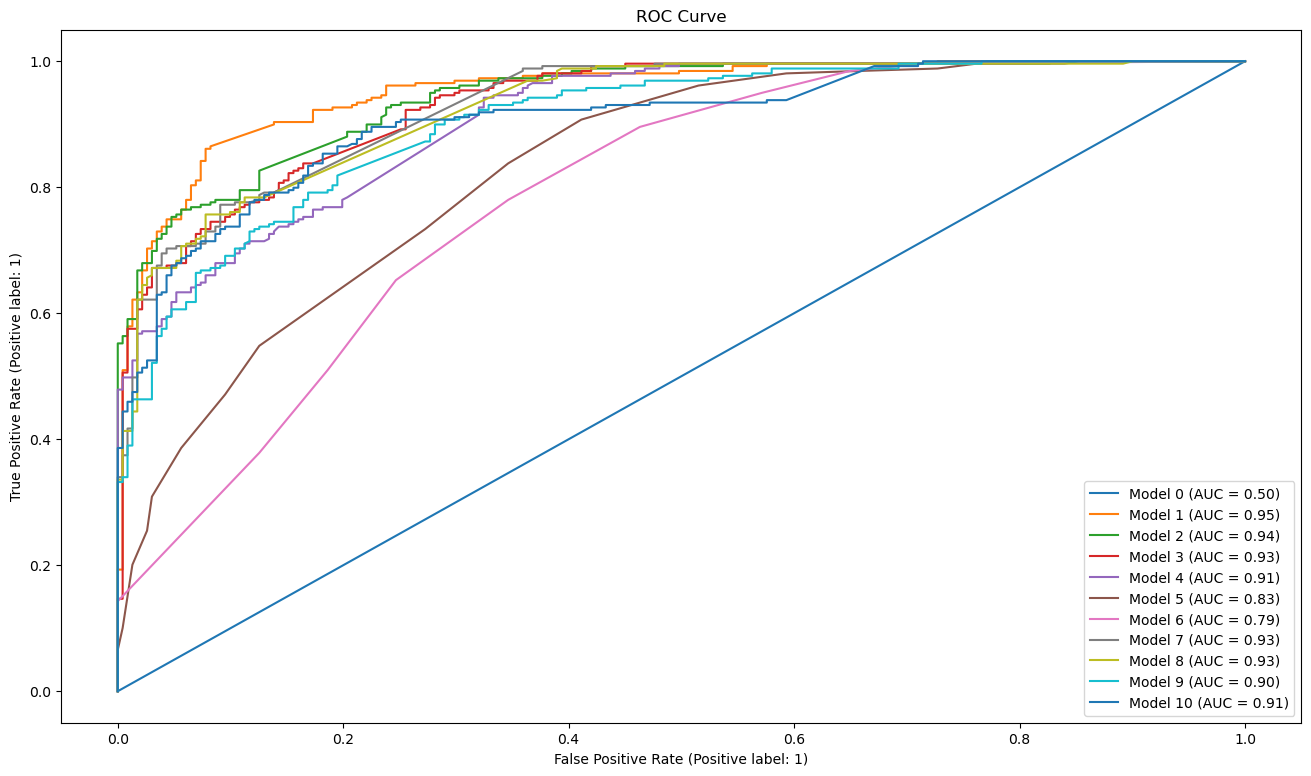

In [84]:
# Create a list containing all the models
list_of_models = [dummy_class, gs_nb_cvec, gs_nb_tfidf, gs_log_cvec,
                 gs_log_tfidf, gs_knn_cvec, gs_knn_tfidf, gs_rf_cvec,
                 gs_rf_tfidf, gs_svc_cvec, gs_svc_tfidf]

# Plot the ROC for all the models
fig, axes = plt.subplots(figsize=(16,9))

for i, model in enumerate(list_of_models):
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes, 
                                   name=f"Model {i}")
plt.title('ROC Curve');

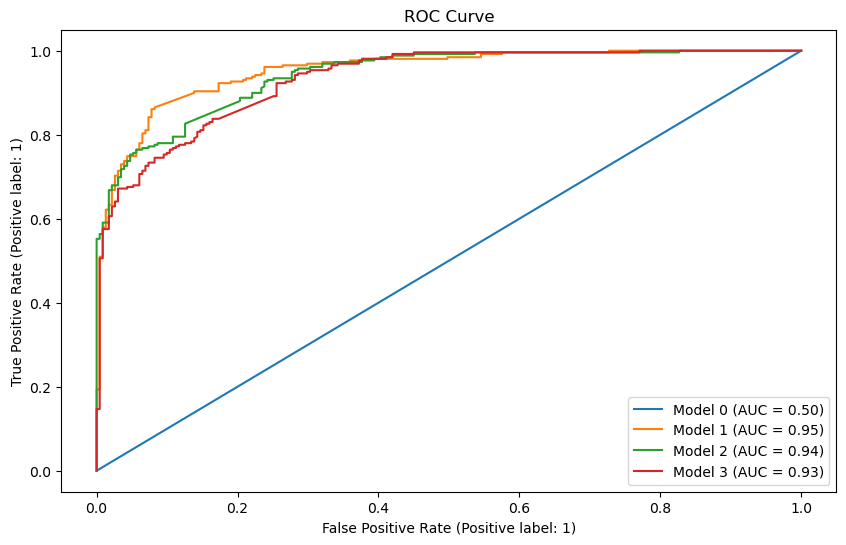

In [85]:
# Narrow down the plot to the top 3 plus baseline
list_of_models = [dummy_class, gs_nb_cvec, gs_nb_tfidf, gs_log_cvec]

# Plot the ROC for all the models
fig, axes = plt.subplots(figsize=(10,6))

for i, model in enumerate(list_of_models):
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes, 
                                   name=f"Model {i}")
plt.title('ROC Curve');

### Confusion Matrix

The confusion matrix is a table that is used to define the performance of a classifier. It provides four catagories using the actual and predicted values:
* True Positive: Correctly predicted as Marvel
* False Positive: Incorrectly predicted as Marvel
* False Negative: Incorrectly predicted as DCEU
* True negative: Correctly predicted as DCEU  

From the plot below, we can see that in terms of accuracy, Models 1 and 2 performs the best, while Models 5 and 6 perform quite badly.

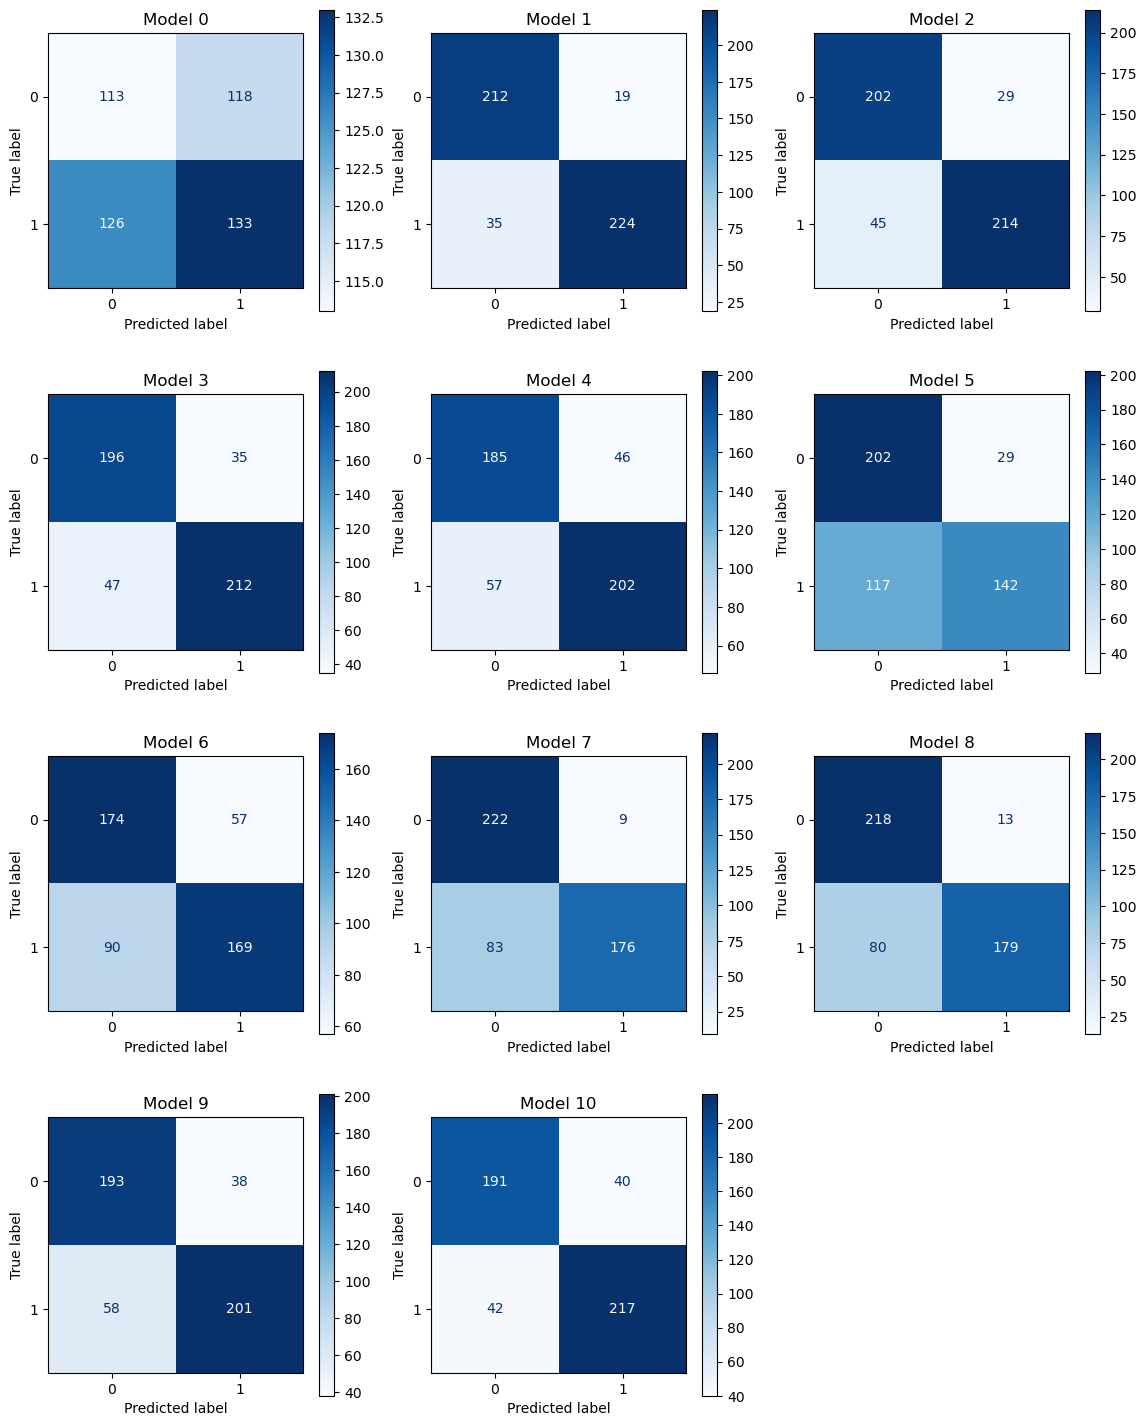

In [86]:
# Create list of confusion matrix values
list_of_cm = [cm0, cm1, cm2, cm3, cm4, cm5, cm6, cm7, cm8, cm9, cm10]

# Counter for the plot
counter = 0

# Plot the confusion matrices
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,18))

for row in range(0,4):
    for col in range(0,3):
        disp = ConfusionMatrixDisplay(list_of_cm[counter])
        axes[row, col].set_title(f"Model {counter}")
        counter += 1
        disp.plot(ax=axes[row, col], cmap='Blues')
        if counter == 11:
            break
            
# Delete unused plots
fig.delaxes(axes[3][2])

### Summary of Model Evaluation

The table below summarises the performance of all the models:  
|Model   | Model Type          |Training Accuracy |Test Accurary | Specificity | Recall | Precision | F1     | ROC AUC |
|------------|---------------------|----|----------|-------------|--------|-----------|--------|---------|
|Model 0     |Dummy Classifier     |0.5133|0.4898    |0.5152       |0.4672  |0.5193     |0.4919  |0.5      |
|Model 1     |Naive Bayes (Cvec)   |0.8998|0.8837|0.9177|0.8533| 0.9208|0.8858| 0.95|
|Model 2     |Naive Bayes (TF-IDF) |0.893| 0.8510|0.8745|0.8301|0.8811|0.8545|0.94|
|Model 3     |Logistic Regression (Cvec)|0.9264|0.8122|0.8182|0.8069|0.8327|0.8196|0.93|
|Model 4     |Logistic Regression (TF-IDF)|0.8684|0.802|0.708|0.8842|0.7736|0.8252|0.91|
|Model 5     |KNN Classifier (Cvec)|0.7778|0.6959|0.8571|0.5521|0.8125|0.6575|0.82|
|Model 6     |KNN Classifier (TF-IDF)|0.7117|0.6612|0.71|0.6178|0.7049|0.6584|0.77|
|Model 7     |Random Forest (Cvec)|0.8187|0.7939|0.9351|0.668|0.9202|0.774|0.91|
|Model 8     |Random Forest (TF-IDF)|0.8098|0.8061|0.9697|0.6602|0.9607|0.7826|0.92|
|Model 9     |Support Vector Machine (Cvec)|0.9298|0.7959|0.8225|0.7722|0.8299|0.8|0.9|
|Model 10    |Support Vector Machine (TF-IDF)|0.9652|0.8347|0.8442|0.8263|0.856|0.8409|0.91|

For our current problem statement, where our aim is to achieve correct branding, it is important to high a high accuracy and ROC AUC score. This is because a high accuracy score ensures that most of the predictions (both for Marvel and DCEU) are correct. A high ROC AUC score will also ensure that both distributions are seperated well.  

By looking at the scores above, we can see that Model 1 (Naive Bayes with CountVectorizer) best fits our scoring criteria. Apart from the above, Model 1 also has a good fit to the data. In comparison, almost all the other models have overfitted. 

### Model 1 (Naive Bayes with CountVectorizer) Feature Analysis

As we have chosen Model 1 as our best performing model, let's look deeper into it and identify its best predictors/features.

In [87]:
# As we cannot extract the features and coefficients from GridSearch, 
# we need to instantiate the model again

# Instantiate the CountVectorizer with the best params
cvec = CountVectorizer(max_features=1000, lowercase=False, ngram_range=(1,2))

# Fit and transform the train and test data
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.fit(X_test)

# Instantiate the Naive Bayes Model with the best params
nb = MultinomialNB(alpha=0.2, fit_prior=False)

# Fit the model
nb.fit(X_train_cvec, y_train)

MultinomialNB(alpha=0.2, fit_prior=False)

In [88]:
#Extract the important features and their probabilities
dceu_impt_words = pd.DataFrame(data=[cvec.get_feature_names_out(), 
                                     np.exp(nb.feature_log_prob_[0])], 
                                     index=['word', 'prob'])
dceu_impt_words = dceu_impt_words.T.sort_values('prob', ascending=False)

mcu_impt_words = pd.DataFrame(data=[cvec.get_feature_names_out(), 
                                     np.exp(nb.feature_log_prob_[1])], 
                                     index=['word', 'prob'])
mcu_impt_words = mcu_impt_words.T.sort_values('prob', ascending=False)

In [89]:
# Set the index for the dataframes
mcu_impt_words = mcu_impt_words[['word', 'prob']].set_index('word')
dceu_impt_words = dceu_impt_words[['word', 'prob']].set_index('word')

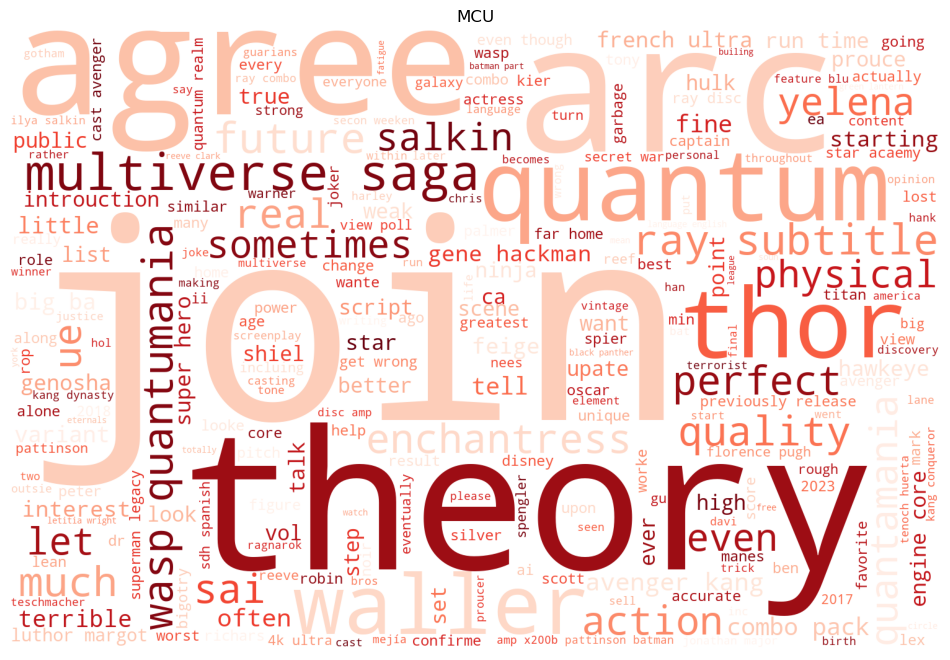

In [90]:
# Create word cloud for Marvel top 500 features
wordcloud_marvel = WordCloud(max_words=250, width=1500, height=1000,
                   background_color='white', colormap='Reds').generate_from_frequencies(frequencies=mcu_impt_words['prob'])

plt.figure(figsize=(12,9))
plt.imshow(wordcloud_marvel)
plt.axis('off')
plt.title('MCU');

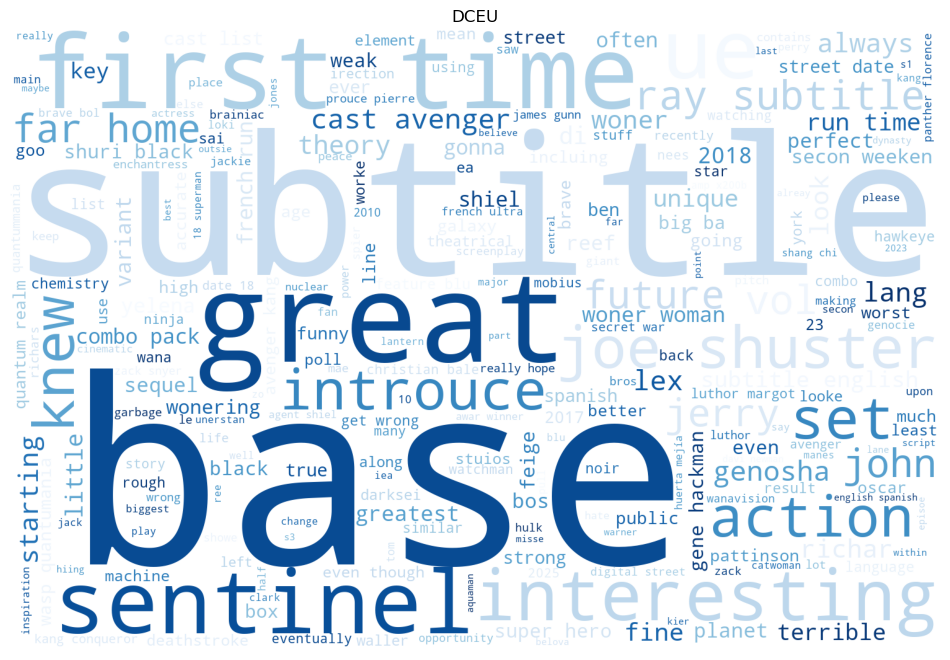

In [91]:
# Create word cloud for Marvel top 500 features
wordcloud_dceu = WordCloud(max_words=250, width=1500, height=1000,
                   background_color='white', colormap='Blues').generate_from_frequencies(frequencies=dceu_impt_words['prob'])

plt.figure(figsize=(12,9))
plt.imshow(wordcloud_dceu)
plt.axis('off')
plt.title('DCEU');

From the word clouds above, we can see that while the model performs well and is able to sort the words correctly, it does make certain mistakes. For example, DCEU terms are being recognized as Marvel terms (e.g. waller, robert pattison, ben affleck). Similarly, some Marvel terms are also being recognized as DCEU terms (e.g. hawkeye, yelena, avenger, kang).

## Conclusion

To recap, our problem statement was to create a model that could differentiate between the two stated brands (MCU and DCEU). In this project, we scraped data from the following two subreddits: r/marvelstudios and r/DC_cinematic. We then trained a relatively accurate multinomial naive bayes model that can predict the correct MCU or DCEU classification with an accuracy of 88%. 

### Recommendations

Due to the nature of the problem statement, where mistakes could result in expensive lawsuits, it is important to further increase the accuracy and useability of the model. Furthermore, the model is trained using the most recent 1000 posts. As such, the model might not be able to recognize older content that is not currently being talked about in reddit. The following improvements could be considered:

**Increase Accuracy**
1. Try other models (e.g. decision trees, bagging, boosting, other more complex models)
2. Remove more common words to ensure that both classifications have a distinct set of words
3. Clean the data further as currently certain distinct words from one classification is being recognized by the other classification (e.g. the name Waller is recognized as a word associated to Marvel, when it is clearly a distinct character in DECU)


**Increase Useability**
1. Train the model on older data, possibly going as far back to when MCU and DECU originated
2. Train the model from different sources (e.g. facebook, twitter, other forums)
3. Consider using data from Marvel and DC comics to cover heroes that have not been released under MCU and DCEU

## Appendix

#### Plot for Presentation Slides

In [92]:
train_test = ['train', 'test', 'train', 'test', 'train', 'test', 'train', 'test']
scores = [0.90, 0.88, 0.89, 0.85, 0.92, 0.81, 0.51, 0.49]
names = ['Naive Bayes - Cvec', 'Naive Bayes - Cvec', 'Naive Bayes - TF-IDF', 'Naive Bayes - TF-IDF', 'Logistic Regression - Cvec', 'Logistic Regression - Cvec', 'Dummy Classifier', 'Dummy Classifier']

In [93]:
df = pd.DataFrame(data=[names, train_test, scores])

In [94]:
df = df.T

In [95]:
df.rename(columns = {0:'Model', 1:'Data', 2:'Accuracy Score'}, inplace=True)

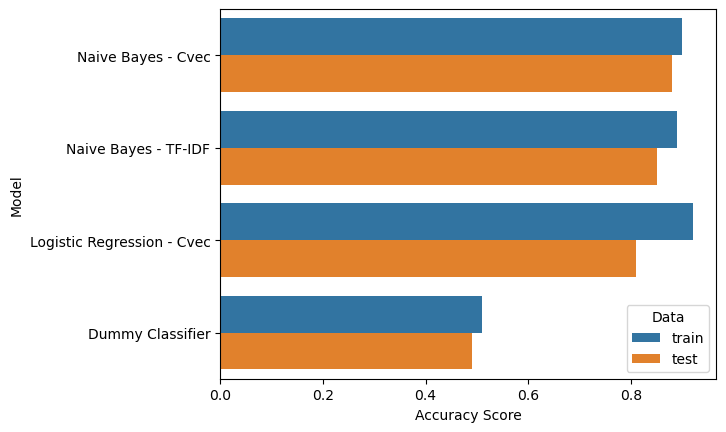

In [96]:
sns.barplot(data=df, y='Model', x='Accuracy Score', hue='Data', orient='h');